## Programas para todos los apartados


Como para muchos apartados se pide que se estudie lo mismo, así agrupo los programas en uno y menos lío.

#### Descripción del programa:

Se usa el programa en c de cada apartado. En todos los apartados es básicamente el mismo, solo que cambio las cosas que dice cada apartado.

El notebook es para TODOS el mismo, ya que coge los datos de las rutas especificadas o de la misma carpeta. Esto facilita el uso del programa a la hora de hacer muchos histogramas, videos o demás ploteos.

Dicho esto, comencemos con el programa.




### 1º Programa: animar N partículas para una caja de lado L

Este programa sirva para hacer la animación de todas las partículas dentro de la caja. Para ello cojemos los datos de posiciones.txt y lo ploteamos. El programa pondrá un punto en cada posición y con un paso temporal lo suficientemente pequeño lo veremos continuo.

Este programa es visual, podemos observar la atracción pero sobretodo la repulsión de las partículas entre ellas.

Para ello defino una función que lea el archivo en cuestión (posiciones.txt) y otra función que las anime.

Con copilot (a parte de ayudarme con las autocompletaciones y comentarios) he implementado una opción para hacer video o gif, según el tiempo que tenga para hacer el ploteo de la animación.

NECESITA:

- posiciones.txt
- N
- L

Suelta:

- simulacion_N_L.mp4 o un gif.


C:\Users\diego\AppData\Local\Temp\ipykernel_17556\3691924720.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion_N16_L4.0.mp4'.


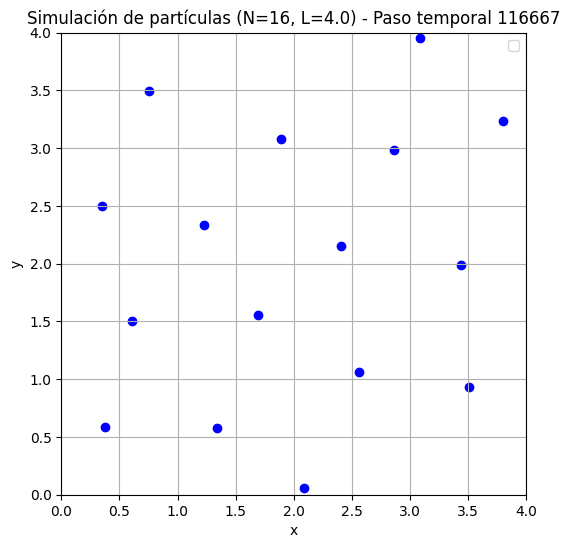

In [6]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=4.0
N=16



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  

        for linea in file:
            linea = linea.strip()
            if linea:  
                datos = linea.split(",")  
                r1x, r1y = float(datos[0]), float(datos[1])  
                paso_actual.append((r1x, r1y))
            else:  
                if paso_actual:  
                    posiciones.append(paso_actual)
                    paso_actual = []  

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Simulación de partículas (N={N}, L={L})")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)


    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Simulación de partículas (N={N}, L={L}) - Paso temporal {frame + 1}")


    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.gif", writer=gif_writer)
        print(f"GIF guardado como 'simulacion_N{N}_L{L}.gif'.")

    # Guardar como video
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.mp4", writer=video_writer)
        print(f"Video guardado como 'simulacion_N{N}_L{L}.mp4'.")

    plt.show()

# Uso el programa
if __name__ == "__main__":
    archivo = "SALIDA.txt"  
    posiciones = leer_posiciones(archivo)


    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

### 2º Programa: Ploteo de energía


#### 2.1 Ploteo fijo de la energía

Este programa coge los datos de energia.txt y plotea 3 curvas, la energía cinética, potencial y total.
Toma solo una imagen por lo que es increblemente rápido.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_N_L.png

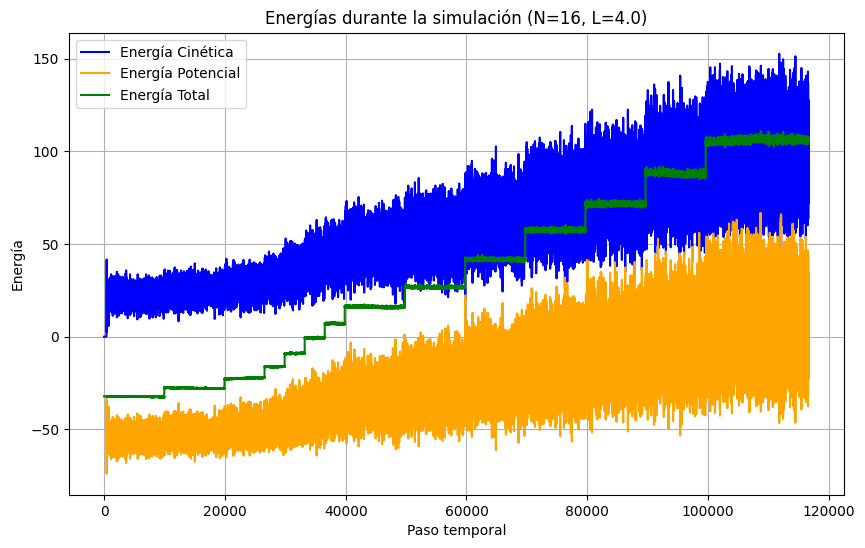

In [1]:
# PLOT DE ENERGIA


#PON LAS DIMENSIONES

L=4.0
N=16

import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title(f"Energías durante la simulación (N={N}, L={L})")  # Título con N y L
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Energia_N{N}_L{L}.png")  # Nombre del archivo con N y L
    plt.show()



##############   LO USAMOS       ####################

if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

### Programa 6: Medir la fluctuación de una partícula frente a otra.

#### 6.1

Este programa mide la distancia entre 2 particulas dadas por el fichero fluctuacion.txt

Necesita:
- Particula que usa
- Partícula de referencia
- fluctuacion7.txt

Suelta:
- fluctuacion_part_{part}.png

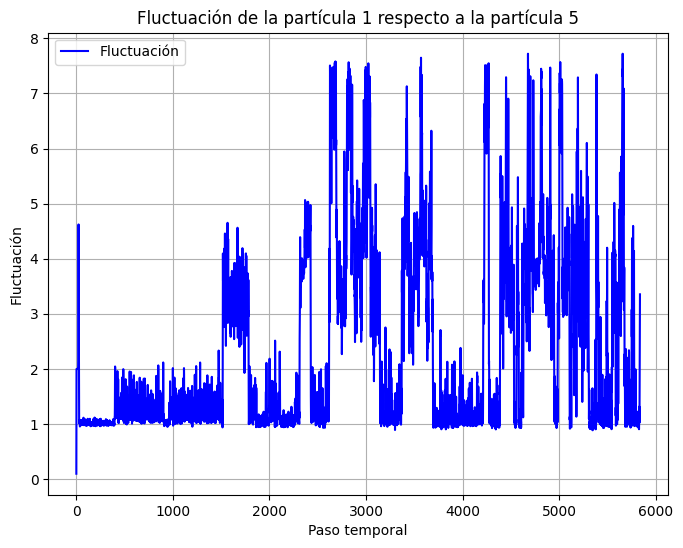

In [4]:
# APARTADO 7: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES CON RESPECTO A OTRA PARTICULA.


#Selecciona la particula que quieres ver la fluctuación part1, y respecto a cual part2:
part1=1
part2=5

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion7.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, color='blue', label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title(f'Fluctuación de la partícula {part1} respecto a la partícula {part2}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"fluctuacion_particula_{part1}_{part2}.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = f"fluctuacion7.txt"  # Nombre del archivo
    particula = part1  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

#### 6.2 Vídeo de todas las fluctuaciones

Ahora se muestran todas las fluctuaciones con respecto a una partícula en concreto, via fluctuacion7.txt

Necesita:
- fluctuacion7.txt
- Particula de referencia

Suelta:
- fluctuaciones.mp4

Video guardado como 'fluctuaciones_5.mp4'.


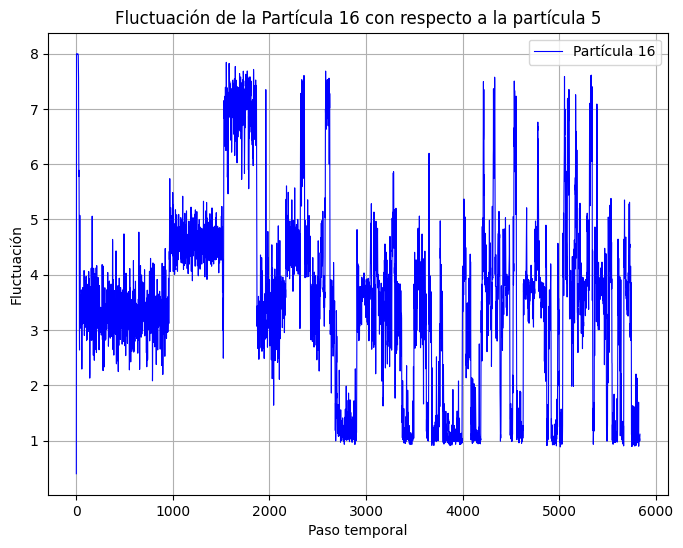

In [5]:
# APARTADO 7: VIDEO DE LAS FLUCTUACIONES


#CAMBIA LA PARTICULA QUE FIJAS

particula=5

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Función para leer las fluctuaciones desde el archivo
def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones de las partículas desde un archivo.
    Cada fila representa una partícula, y un salto de línea indica un cambio de paso temporal.

    Args:
        filename (str): Nombre del archivo a leer.

    Returns:
        list: Lista de listas, donde cada sublista contiene la evolución temporal de una partícula.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        particulas_actuales = []  # Almacena las fluctuaciones de las partículas en un paso temporal
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = list(map(float, linea.split()))  # Convertir los valores a flotantes
                particulas_actuales.append(datos)
            else:  # Si encontramos un salto de línea, procesamos el paso temporal
                if particulas_actuales:
                    # Transponer para obtener la evolución temporal de cada partícula
                    if not fluctuaciones:
                        fluctuaciones = [[] for _ in range(len(particulas_actuales))]
                    for i, particula in enumerate(particulas_actuales):
                        fluctuaciones[i].extend(particula)
                    particulas_actuales = []  # Reiniciar para el siguiente paso temporal

        # Procesar el último paso si no está vacío
        if particulas_actuales:
            if not fluctuaciones:
                fluctuaciones = [[] for _ in range(len(particulas_actuales))]
            for i, particula in enumerate(particulas_actuales):
                fluctuaciones[i].extend(particula)

    return fluctuaciones

# Función para crear el video directamente
def crear_video(fluctuaciones, video_path, intervalo=500):
    """
    Crea un video donde cada frame muestra el gráfico de fluctuación de una partícula.

    Args:
        fluctuaciones (list): Lista de listas con las fluctuaciones de las partículas.
        video_path (str): Ruta donde se guardará el video.
        intervalo (int): Intervalo entre frames en milisegundos.
    """
    writer = FFMpegWriter(fps=1000 // intervalo)
    fig, ax = plt.subplots(figsize=(8, 6))

    with writer.saving(fig, video_path, dpi=100):
        for particula_idx, fluctuacion in enumerate(fluctuaciones):
            pasos = range(1, len(fluctuacion) + 1)
            ax.clear()
            ax.plot(pasos, fluctuacion, color='blue', linewidth=0.8, label=f'Partícula {particula_idx + 1}')
            ax.set_xlabel('Paso temporal')
            ax.set_ylabel('Fluctuación')
            ax.set_title(f'Fluctuación de la Partícula {particula_idx + 1} con respecto a la partícula {particula}')
            ax.legend()
            ax.grid(True)
            writer.grab_frame()

    print(f"Video guardado como '{video_path}'.")

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacion7.txt"  # Nombre del archivo de fluctuaciones
    video_path = f"fluctuaciones_{particula}.mp4"

    # Leer las fluctuaciones
    fluctuaciones = leer_fluctuaciones(archivo)

    # Crear el video directamente
    crear_video(fluctuaciones, video_path, intervalo=500)